In [1]:
% matplotlib inline
import numpy as np
from helpers import load_data
import scipy.sparse as sp

files_full_numpy = [\
        #'../submission/saved_0.98475.npy',\
        #'../submission/saved_0.984.npy', \
        '../saved/blend_0.06255_8.npy']
files_numpy = [\
        #'../submission/saved_0.98475.npy',\
        #'../submission/saved_0.984.npy', \
        '../saved/saved_0.98464,.npy']

file_train_true = '../data/data_train.csv'
file_submission_true = '../data/sampleSubmission.csv'

In [2]:
# second 
folder = 'second'
# trained on whole dataset:
#'../submission/train_surprise_unrounded_0.99256.csv'
files_full_submission = [ \
    '../submission/training_prediction_ALS_BaselineOnly.csv',\
    '../submission/training_prediction_KNNBasic_ALS_pearson_baseline_item_based.csv',\
    '../submission/training_prediction_KNNBasic_ALS_pearson_baseline_user_based.csv',\
    '../submission/training_prediction_KNNBasic_pearson_baseline_user_based.csv',\
    '../submission/training_prediction_SGD_BaselineOnly.csv'
    ]
files_submission = [ \
    '../submission/submission_ALS_BaselineOnly.csv',\
    '../submission/submission_KNNBasic_ALS_pearson_baseline_item_based.csv',\
    '../submission/submission_KNNBasic_ALS_pearson_baseline_user_based.csv',\
    '../submission/submission_KNNBasic_pearson_baseline_user_based.csv',\
    '../submission/submission_SGD_BaselineOnly.csv'
                    ]
#files_submission = [ \
#        '../submission/submission_surprise_unrounded_0.99256.csv']

#errors_submission = [0.98475, 0.984, 0.98431, 0.99256]

names = ['ALS', 'ALS_Baseline', 'KNN_ALS_item', 'KNN_ALS_user', 'KNN_user', 'SGD_Baseline']
#names = ['ALS','ALS','ALS','SVD surprise']


In [3]:
# third
folder = 'third'
files_submission = [ \
    '../submission/submission_KNNBasic_ALS_pearson_baseline_item_based.csv',
    '../submission/submission_KNNBasic_ALS_pearson_baseline_user_based.csv',
    '../submission/submission_KNNBasic_cosine_item_based.csv',
    '../submission/submission_KNNBasic_cosine_user_based.csv',
    '../submission/submission_KNNBasic_msd_item_based.csv',
    '../submission/submission_KNNBasic_msd_user_based.csv',
    '../submission/submission_KNNBasic_pearson_baseline_item_based.csv',
    '../submission/submission_KNNBasic_pearson_baseline_user_based.csv',
    '../submission/submission_KNNBasic_pearson_user_based.csv',
    '../submission/submission_SGD_BaselineOnly.csv',
    '../submission/submission_surprise_unrounded_0.99256.csv'
                         ]
files_full_submission = [ \
'../submission/training_prediction_ALS_BaselineOnly.csv',
'../submission/training_prediction_KNNBasic_ALS_pearson_baseline_item_based.csv',
'../submission/training_prediction_KNNBasic_ALS_pearson_baseline_user_based.csv',
'../submission/training_prediction_KNNBasic_cosine_item_based.csv',
'../submission/training_prediction_KNNBasic_cosine_user_based.csv',
'../submission/training_prediction_KNNBasic_msd_item_based.csv',
'../submission/training_prediction_KNNBasic_msd_user_based.csv',
'../submission/training_prediction_KNNBasic_pearson_baseline_item_based.csv',
'../submission/training_prediction_KNNBasic_pearson_baseline_user_based.csv',
'../submission/training_prediction_KNNBasic_pearson_user_based.csv',
'../submission/training_prediction_SGD_BaselineOnly.csv'
                         ]

names = [\
'ALS_BaselineOnly',
'KNN_ALS_pearson_baseline_item',
'KNN_ALS_pearson_baseline_user',
'KNN_cosine_item',
'KNN_cosine_user',
'KNN_msd_item',
'KNN_msd_user',
'KNN_pearson_baseline_item',
'KNN_pearson_baseline_user',
'KNN_pearson_user',
'SGD_BaselineOnly'
         ]


In [4]:
from blending import get_all_indices, read_numpy_files, apply_indices
from our_helpers import load_data
# Read full matrices 
train_true = load_data(file_train_true)
training_true = apply_indices([train_true], 'train')[0]
test_true = apply_indices([train_true], 'test')[0]
validation_true = apply_indices([train_true], 'validation')[0]

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of rows, cols: 1117939
treating matrix 0
number of non-zero elements in matrix 0: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403
treating matrix 0
number of non-zero elements in matrix 0: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 29610
treating matrix 0
number of non-zero elements in matrix 0: 29610


In [5]:
submission_true = load_data(file_submission_true)
indices = get_all_indices(train_true, submission_true)
trains_full = read_numpy_files(files_full_numpy, indices)
trains_submission = read_numpy_files(files_numpy, indices)

number of items: 10000, number of users: 1000
number of rows, cols to read out: 2353904
matrix 0
dense matrix shape: (10000, 1000)
number of non-zero elements in matrix: 2353904
matrix 0
dense matrix shape: (10000, 1000)
number of non-zero elements in matrix: 2353904


In [6]:
# Apply indices.
from blending import apply_indices
train_est = apply_indices(trains_full, 'train') 
test_est = apply_indices(trains_full, 'test') 
submission_est = apply_indices(trains_submission, 'submission') 
validation_est = apply_indices(trains_full, 'validation') 

number of items: 10000, number of users: 1000
number of rows, cols: 1117939
treating matrix 0
number of non-zero elements in matrix 0: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403
treating matrix 0
number of non-zero elements in matrix 0: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 1176952
treating matrix 0
number of non-zero elements in matrix 0: 1176952
number of items: 10000, number of users: 1000
number of rows, cols: 29610
treating matrix 0
number of non-zero elements in matrix 0: 29610


In [7]:
# Add matrices saved in submission format.
from blending import read_submission_files
surprise_full = read_submission_files(files_full_submission)
surprise_train_est = apply_indices(surprise_full, 'train') 
surprise_test_est = apply_indices(surprise_full, 'test') 
surprise_validation_est = apply_indices(surprise_full, 'validation') 
surprise_submission = read_submission_files(files_submission)

for i in range(len(surprise_train_est)):
    validation_est.append(surprise_validation_est[i])
    train_est.append(surprise_train_est[i])
    test_est.append(surprise_test_est[i])
    submission_est.append(surprise_submission[i])

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of rows, cols: 1117939
treating matrix 0
number of non-zero elements in matrix 0: 1117939
treating matrix 1
number of non-zero elements in matrix 1: 1117939
treating matrix 2
number of non-zero elements in matrix 2: 1117939
treating matrix 3
number of non-zero elements in matrix 3: 1117939
treating matrix 4
number of non-zero elements in matrix 4: 1117939
treating matrix 5
number of non-zero elements in matrix 5: 1117939
treating matrix 

In [8]:
print(folder)

third


In [ ]:
# Add new method to the whole matrix.
#files_full_submission = [ \
#    '../submission/training_prediction_KNNBasic_ALS_pearson_baseline_item_based.csv',\
#    '../submission/training_prediction_KNNBasic_ALS_pearson_baseline_user_based.csv',\
#    ]
#files_submission = [ \
#    '../submission/submission_KNNBasic_ALS_pearson_baseline_item_based.csv',\
#    '../submission/submission_KNNBasic_ALS_pearson_baseline_user_based.csv',\
#                    ]
#surprise_full = read_submission_files(files_full_submission)
#surprise_train_est = apply_indices(surprise_full, 'train') 
#surprise_test_est = apply_indices(surprise_full, 'test') 
#surprise_validation_est = apply_indices(surprise_full, 'validation') 
#surprise_submission = read_submission_files(files_submission)
#    
#validation_est[2] = surprise_validation_est[0]
#validation_est[3] = surprise_validation_est[1]
#train_est[2] = surprise_train_est[0]
#train_est[3] = surprise_train_est[1]
#test_est[2] = surprise_test_est[0]
#test_est[3] = surprise_test_est[1]
#submission_est[2] = surprise_submission[0]
#submission_est[3] = surprise_submission[1]

user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
[[ 3.88198722  3.55395947  3.88198857  3.42751077  3.91749404]
 [ 3.44736591  3.53125942  3.99708306  3.316248    3.31358485]
 [ 3.43570549  3.96821354  4.21315948  3.22487127  3.45183535]
 [ 3.44584015  3.33257725  2.98045152  5.16339799  3.73547317]
 [ 3.33633914  3.42749437  3.49582904  4.19662186  3.89304516]]
user min, max, mean: 8 4373 1117.64564565
[[ 3.47823539  3.5509846   3.43871956  3.8326914   3.51237108]
 [ 3.71262246  3.43367378  3.60893073  3.63677395  3.66353333]
 [ 2.96553372  2.95837998  3.6007766   3.96158314  3.52706339]
 [ 3.37346451  3.44836609  3.49980695  3.69926609  3.74118564]
 [ 3.60746371  3.66248834  3.5549754   3.74027238  3.59989912]]
user min, max, mean: 8 4373 1117.64564565
[[ 4.14954687  3.13598764  3.87175954  3.33377486  4.01902157]
 [ 3.63817722  2.37869992  3.48625215  2.92590882  3.34965003]
 [ 3.83553713  3.25335552  4.46741183  2.99013763  3.34517933]
 [ 3.421797

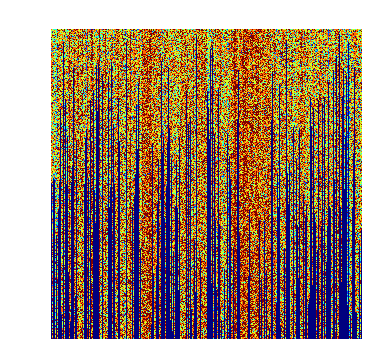

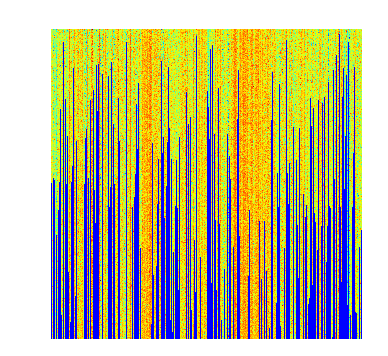

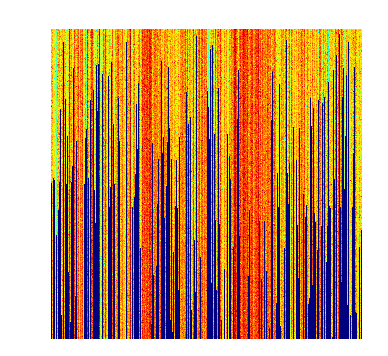

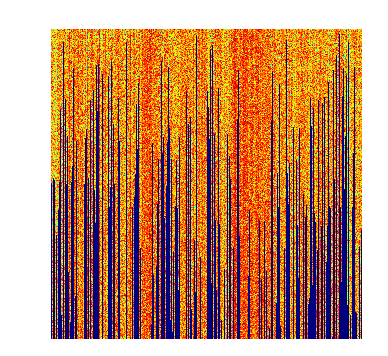

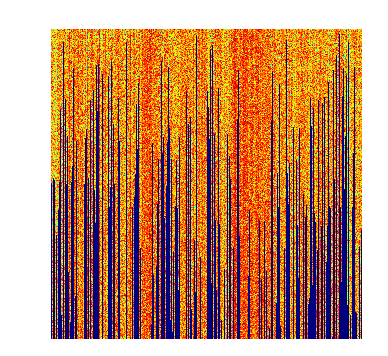

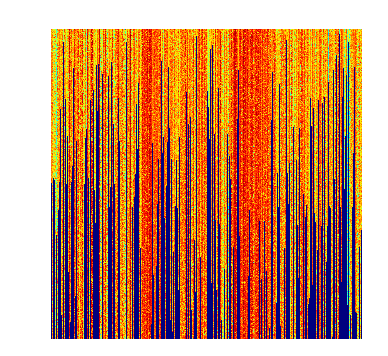

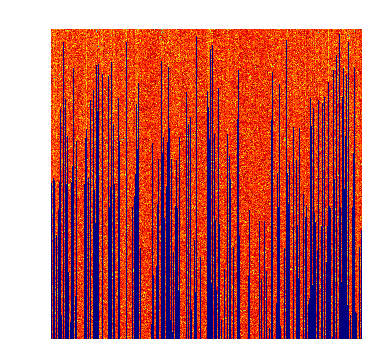

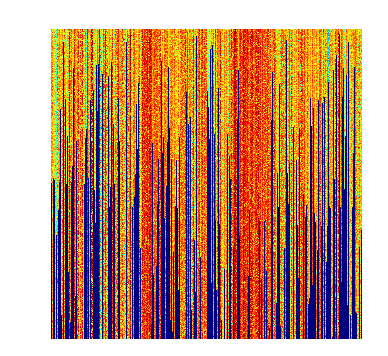

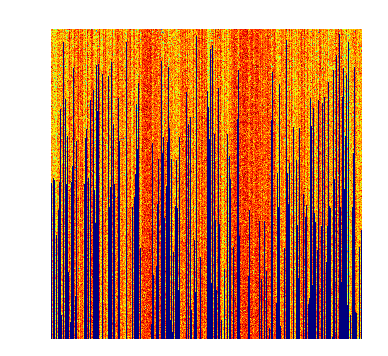

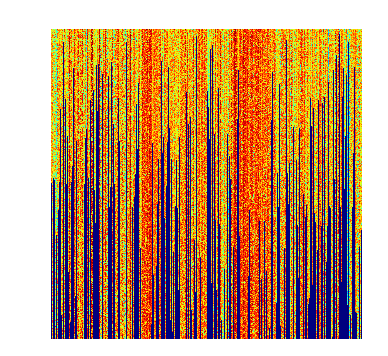

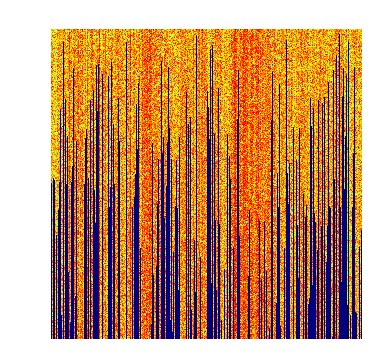

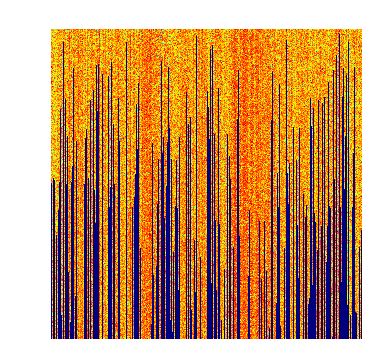

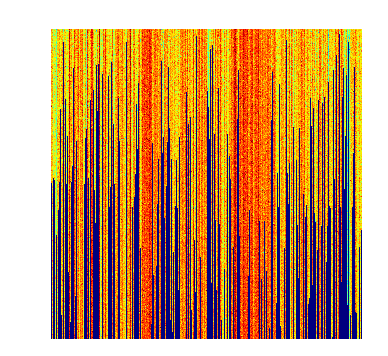

In [13]:
from data_postprocess import create_sparse_matrix_plot
# Visualize matrices
i_total, ratings_dense = create_sparse_matrix_plot(training_true, '../results/Blending/{}/matrix_train.png'.format(folder))

dense_matrices=[]
dense_matrices.append(ratings_dense.copy())
#j_total, _ = create_matrix_plot(train_true, axis=1)
for i,matrix_est in enumerate(train_est):
    __, ratings_dense = create_sparse_matrix_plot(matrix_est, '../results/Blending/{}/matrix_{}'.format(folder,i+1))
    print(ratings_dense[:5,:5])
    dense_matrices.append(ratings_dense.copy())

diff goes from 4.463386218474259 to -4.126956509506261
diff goes from 4.0 to -3.3725564209581718
diff goes from 2.823162051605256 to -2.3148305928969592
diff goes from 2.823162051605256 to -2.3148305928969592
diff goes from 3.5 to -2.7724897654360414
diff goes from 3.845518006859269 to -2.551998655221372
diff goes from 3.0245347264179507 to -2.4381368981316367
diff goes from 3.7319461342542395 to -3.2085503688300525
diff goes from 2.930396878410926 to -2.255031951335649
diff goes from 3.0568173452978202 to -2.584079143643765
diff goes from 3.2510896985601674 to -2.9963977149179253
diff goes from 4.0 to -3.406359337503425


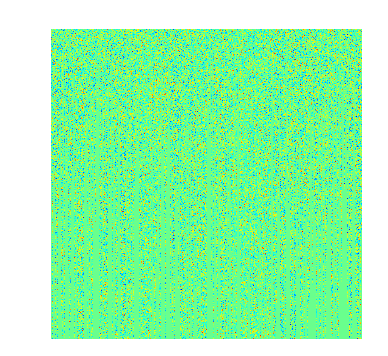

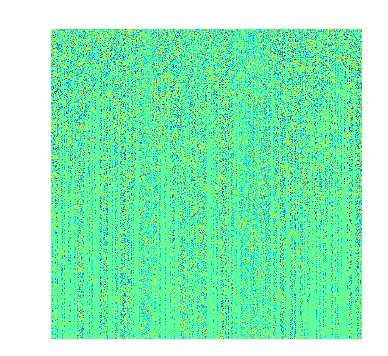

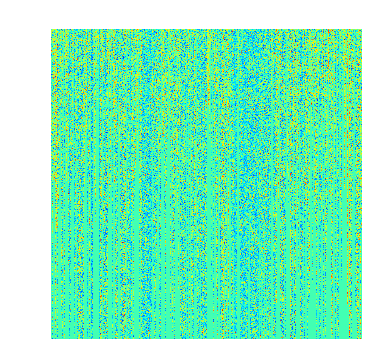

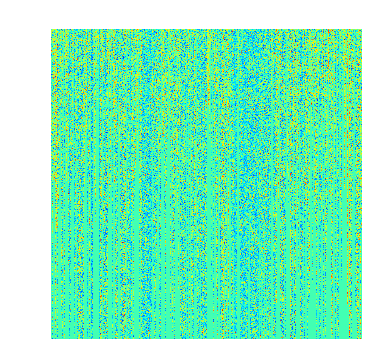

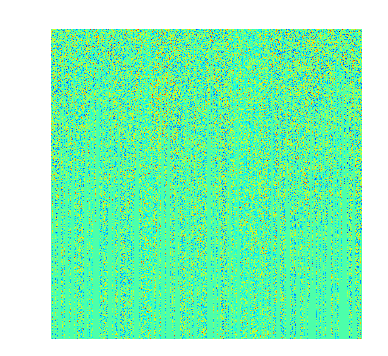

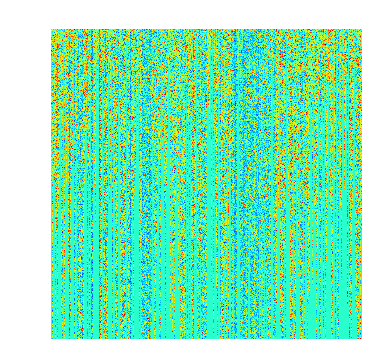

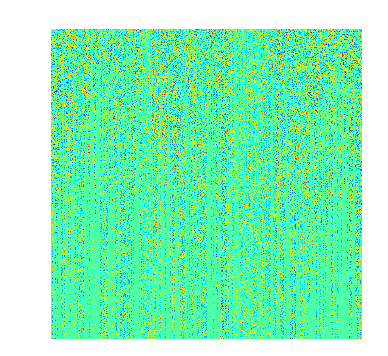

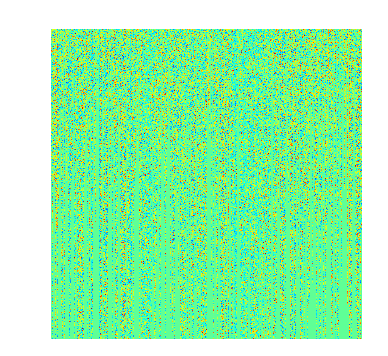

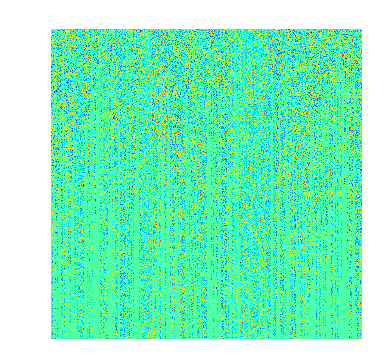

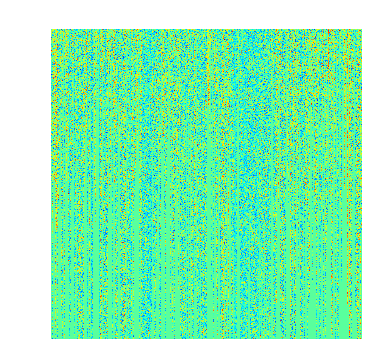

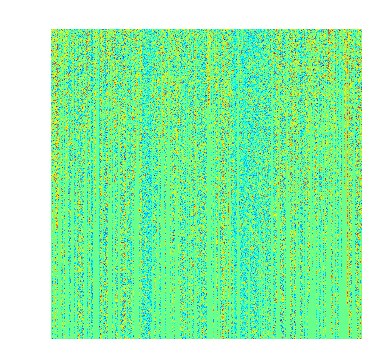

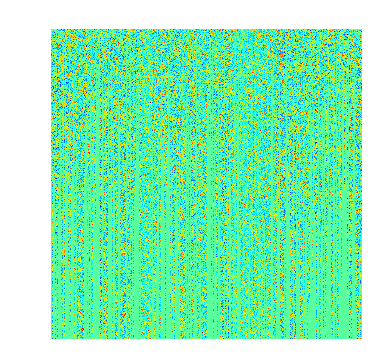

In [10]:
from data_postprocess import matrix_plot
for i in range(1,len(dense_matrices)):
    diff_matrix = dense_matrices[i]-dense_matrices[0]
    print('diff goes from {} to {}'.format(np.max(diff_matrix),np.min(diff_matrix)))
    matrix_plot(diff_matrix, '../results/Blending/{}/matrix_diff{}.png'.format(folder,i), 1000)

In [ ]:
#test_est_new = [test_est[0],test_est[1], test_est[3], test_est[4], test_est[5]]
#submission_est_new = [submission_est[0],submission_est[1], submission_est[3], submission_est[4], submission_est[5]]
#validation_est_new = [validation_est[0],validation_est[1], validation_est[3], validation_est[4], validation_est[5]]
test_est_new = test_est
submission_est_new = submission_est
validation_est_new = validation_est

In [ ]:
#del test_est_new[3]
#del submission_est_new[3]
#del validation_est_new[3]
#del names[3]

In [15]:
from blending import linear_blending
q_hat,x = linear_blending(test_est_new, submission_est_new, test_true)
print(x)
print(q_hat)
print(len(q_hat))

KeyboardInterrupt: 

In [ ]:
cutoff = 1000
rows,cols,true_values = sp.find(validation_true)
file_name = '../results/Blending/{}/matrix_validation.png'.format(folder)
title = 'Validation data'
i_total, validation_dense = create_sparse_matrix_plot(validation_true, file_name ,cutoff, title)


Q = np.empty((len(true_values),len(validation_est_new)))
for i,validation_prediction in enumerate(validation_est_new):
    __,__,predictions = sp.find(validation_prediction)
    Q[:,i] = predictions
    rmse = np.sqrt(np.sum(np.power(predictions-true_values, 2)) / len(true_values))
    print('rmse method {}: {}'.format(i,rmse))
    file_name = '../results/Blending/{}/matrix_validation_{}.png'.format(folder, i)
    title = 'Method {}, validation error: {:1.5f}'.format(names[i], rmse)
    create_sparse_matrix_plot(validation_prediction, file_name, cutoff, title)
    print(predictions - true_values)


blending_prediction = np.dot(Q,x) 
rmse = np.sqrt(np.sum(np.power(blending_prediction-true_values, 2)) / len(true_values))
print('blending method: {}'.format(i,rmse))

# create sparse matrix from predictions
validation_blending = sp.lil_matrix(validation_true.shape)
for k, (i,j) in enumerate(zip(rows, cols)):
    validation_blending[i,j] = blending_prediction[k]
print(k)
file_name = '../results/Blending/{}/matrix_blending.png'.format(folder)
title = 'Method Blending, validation error: {:1.5f}'.format(rmse)
test = create_sparse_matrix_plot(validation_blending, file_name, cutoff, title)

In [ ]:
file = '../data/sampleSubmission.csv'
#indices_matrix = load_data(file)
rows, cols, __ = sp.find(indices_matrix)
print(len(rows))
submission_blending = sp.lil_matrix(validation_true.shape)
k = 0
for (i,j) in zip(rows, cols):
    if q_hat[k] == 0:
        print('one element was zero!')
    submission_blending[i,j] = q_hat[k]
    k += 1
print(k)


In [ ]:
from our_helpers import write_predictions_csv
print(submission_blending.nnz)
write_predictions_csv('../results/Blending/{}/submission.csv'.format(folder), submission_blending)

In [ ]:
ratings = load_data('../results/Blending/s{}/submission.csv'.format(folder))
print(ratings.nnz)